In [1]:
import pandas as pd
import numpy as np
import os
import glob as gb
from functools import reduce

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import numpy.linalg as la
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import kstest

import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'C:\\Users\\padu\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map'
os.chdir(path)

In [3]:
data = pd.read_csv('NPAVariables.csv')
data = data.drop_duplicates(subset ='NPA', keep = 'first')
data.to_csv('NPAVariables.csv')

In [4]:
All = gb.glob(path + "/*.csv")
All

['C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Buildings30YearsOlder.csv',
 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Covariates_obj32010.csv',
 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Covariates_obj32011.csv',
 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Covariates_obj32012.csv',
 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Covariates_obj32013.csv',
 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Covariates_obj32014.csv',
 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Covariates_obj32015.csv',
 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Covariates_obj32016.csv',
 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\Covariates_obj32

In [5]:
results = [pd.read_csv(csv) for csv in All if csv != 'C:\\Users\\padu\\Dropbox (UNC Charlotte)\\Providence Adu’s files\\Objective 3\\Map\\FinalVariables.csv']

In [6]:
results

[     Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
 0             0             0               0                 0   
 1             1             1               1                 1   
 2             2             2               2                 2   
 3             3             3               3                 3   
 4             4             4               4                 4   
 ..          ...           ...             ...               ...   
 454         454           454             454               454   
 455         455           455             455               455   
 456         456           456             456               456   
 457         457           457             457               457   
 458         458           458             458               458   
 
      Unnamed: 0.1.1.1.1  AllYears2020  AllYears2019  AllYears2018  \
 0                     0           726           726           731   
 1                     1          3588    

In [7]:
Data = reduce(lambda right, left: pd.merge(right,left, on ='NPA'), results)

In [8]:
Data.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1_x', 'Unnamed: 0.1.1_x',
       'Unnamed: 0.1.1.1_x', 'Unnamed: 0.1.1.1.1_x', 'AllYears2020',
       'AllYears2019', 'AllYears2018', 'AllYears2017', 'AllYears2016',
       ...
       'ResRezone2016', 'ResRezone2017', 'ResRezone2018', 'ResRezone2019',
       'ResRezone2020', 'TotalInvestmentsNPA', 'TotalResInvestmentsCLT',
       'TotalInvestmentsCLT', 'TotalResInvestmentNPA', 'LQ'],
      dtype='object', length=288)

In [9]:
for row in Data:
    print(row)

Unnamed: 0_x
Unnamed: 0.1_x
Unnamed: 0.1.1_x
Unnamed: 0.1.1.1_x
Unnamed: 0.1.1.1.1_x
AllYears2020
AllYears2019
AllYears2018
AllYears2017
AllYears2016
AllYears2015
AllYears2014
AllYears2013
AllYears2012
AllYears2011
AllYears2010
YearBuilt2020
YearBuilt2019
YearBuilt2018
YearBuilt2017
YearBuilt2016
YearBuilt2015
YearBuilt2014
YearBuilt2013
YearBuilt2012
YearBuilt2011
YearBuilt2010
NPA
Acres
Percent30Years2010
Percent30Years2011
Percent30Years2012
Percent30Years2013
Percent30Years2014
Percent30Years2015
Percent30Years2016
Percent30Years2017
Percent30Years2018
Percent30Years2019
Percent30Years2020
PercentAsian2010
PercentBlack2010
PercentWhite2010
PercentHispanic2010
PercentOwnerOccupied2010
PercentAlaska2010
PercentHawaiian2010
PercentSomeOther2010
PercentTwoorMore2010
PercentMinority2010
PercentAsian2011
PercentBlack2011
PercentWhite2011
PercentHispanic2011
PercentOwnerOccupied2011
PercentAlaska2011
PercentHawaiian2011
PercentSomeOther2011
PercentTwoorMore2011
PercentMinority2011
Percent

In [10]:
Data

,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1_x,Unnamed: 0.1.1.1_x,Unnamed: 0.1.1.1.1_x,AllYears2020,AllYears2019,AllYears2018,AllYears2017,AllYears2016,...,ResRezone2016,ResRezone2017,ResRezone2018,ResRezone2019,ResRezone2020,TotalInvestmentsNPA,TotalResInvestmentsCLT,TotalInvestmentsCLT,TotalResInvestmentNPA,LQ
0,0,0,0,0,0,726,726,731,733,731,...,0,0,0,1,1,297,27000,97174,33,0.399893
1,0,0,0,0,0,726,726,731,733,731,...,0,0,0,1,1,297,27000,97174,33,0.399893
2,1,1,1,1,1,3588,3588,3584,3591,3528,...,2,0,0,8,1,2594,27000,97174,393,0.545267
3,1,1,1,1,1,3588,3588,3584,3591,3528,...,2,0,0,8,1,2594,27000,97174,393,0.545267
4,2,2,2,2,2,425,425,415,418,413,...,0,0,0,0,0,282,27000,97174,31,0.395639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,384,384,384,384,384,934,934,911,918,921,...,0,0,0,0,1,289,27000,97174,75,0.934006
768,390,390,390,390,390,886,886,884,884,883,...,0,0,0,0,0,14,27000,97174,0,0.000000
769,390,390,390,390,390,886,886,884,884,883,...,0,0,0,0,0,14,27000,97174,0,0.000000
770,433,433,433,433,433,1422,1422,1384,1382,1361,...,0,0,0,0,0,3,27000,97174,0,0.000000


In [11]:
Data = reduce(lambda right, left: pd.merge(right,left, on ='NPA'), results)

In [12]:
Data.shape

(772, 288)

In [15]:
#scale for housing units
Years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

for year in Years:
    print(year)
    Data['ResRenoPerHousingUnits'+str(year)] = Data['ResReno'+str(year)]/Data['HousingUnits'+str(year)]

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [13]:
years =  [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

for row in years:
    Data['ResInv'+str(row)] = Data['NewRes'+str(row)] + Data['ResRezone'+str(row)] + Data['HTF'+str(row)]

In [14]:
Data['ResInvPerLA'] = Data['ResInv2010']/Data['LandArea']

In [14]:
Data = Data.where(Data['ResInv2010']>0.0)

In [15]:
Data = Data[Data['ResInv2010']> 0]

In [17]:
Data['ResReno2010'].describe()

count    772.000000
mean       6.176166
std        8.915226
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       88.000000
Name: ResReno2010, dtype: float64

The shape for ResRenoPerHousingUnits2010 (772, 311)
ResRenoPerHousingUnits2010
count    772.000000
mean       0.007159
std        0.008654
min        0.000000
25%        0.001397
50%        0.004138
75%        0.009957
max        0.058313
Name: ResRenoPerHousingUnits2010, dtype: float64
The shape for ResRenoPerHousingUnits2011 (772, 311)
ResRenoPerHousingUnits2011
count    772.000000
mean       0.006541
std        0.007174
min        0.000000
25%        0.001183
50%        0.004301
75%        0.008949
max        0.037500
Name: ResRenoPerHousingUnits2011, dtype: float64
The shape for ResRenoPerHousingUnits2012 (772, 311)
ResRenoPerHousingUnits2012
count    772.000000
mean       0.007366
std        0.015299
min        0.000000
25%        0.001163
50%        0.004091
75%        0.008889
max        0.215873
Name: ResRenoPerHousingUnits2012, dtype: float64
The shape for ResRenoPerHousingUnits2013 (772, 311)
ResRenoPerHousingUnits2013
count    772.000000
mean       0.007717
std        0.0133

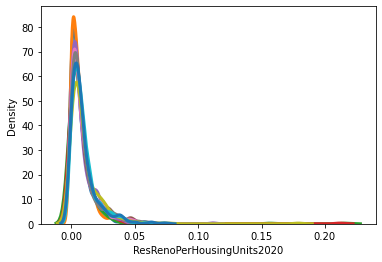

In [22]:
for row in Data:
    if row.startswith('ResRenoPerHousingUnits'):
        Datanew = Data
        print("The shape for "  + str(row) + " "+ str(Datanew.shape))
        print(row)
        print(Datanew[row].describe())
        sns.distplot(Datanew[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
        
#         Datanew.plot.scatter(x='PercentBlack'+str(row[-4:]),y = row, s = 50)
#         print(row + " " + str(kstest(Data[row], 'norm')))

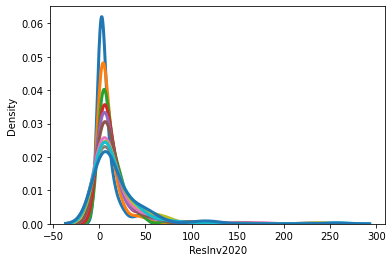

In [20]:
for row in Data:
    if row.startswith('ResInv2'):
        Datanew = Data[Data[row]>0]
        sns.distplot(Datanew[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
#         print(row + " " + str(kstest(Data[row], 'norm')))

In [38]:
for year in years:
    print(year)
    print(Data['ResInv'+str(year)].describe())


2010
count    386.000000
mean       3.383420
std        8.726323
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       81.000000
Name: ResInv2010, dtype: float64
2011
count    386.000000
mean       3.435233
std        9.400868
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      107.000000
Name: ResInv2011, dtype: float64
2012
count    386.000000
mean       4.318653
std        9.738104
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       86.000000
Name: ResInv2012, dtype: float64
2013
count    386.000000
mean       5.512953
std       12.284129
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max       93.000000
Name: ResInv2013, dtype: float64
2014
count    386.000000
mean       5.556995
std       13.884986
min        0.000000
25%        0.000000
50%        0.000000
75%        5.000000
max      129.000000
Name: ResInv2014, dtype: float64
2015
count

In [11]:
Data['PercentBlack2010'].describe()

count    385.000000
mean      34.780407
std       27.897991
min        0.000000
25%       10.504024
50%       28.243021
75%       55.194805
max      100.000000
Name: PercentBlack2010, dtype: float64

In [13]:
Data['PercentBlack2010'].isna().sum()

1

In [14]:
kstest(Data['PercentMinority2020'], 'norm')

KstestResult(statistic=0.6379675697441449, pvalue=3.6379422918209993e-153)

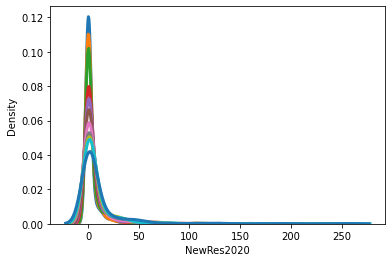

In [15]:
for row in Data:
    if row.startswith('NewRes'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
#         print(row + " " + str(kstest(Data[row], 'norm')))

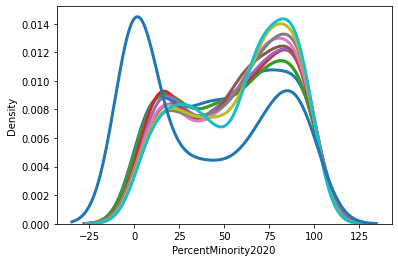

In [16]:
for row in Data:
    if row.startswith('PercentMinority'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
#         print(row + " " + str(kstest(Data[row], 'norm')))

In [17]:
# for row in Data:
#     if row.startswith('PercentMinority'):
#         var = row + 'cox'
#         Data[row] =  Data[row] + 1
#         Data[var] = boxcox(Data[row],0.5)
#         sns.distplot(Data[var], hist = False, kde = True,
#                  kde_kws = {'linewidth': 3})
        
#         print(row + " " + str(kstest(Data[row], 'norm')))

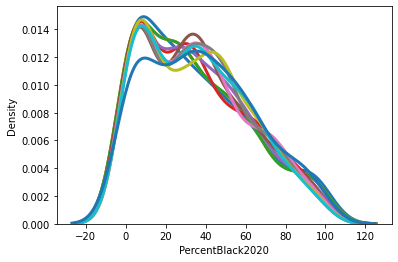

In [18]:
for row in Data:
    if row.startswith('PercentBlack'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
        
#         print(row + " " + str(kstest(Data[row], 'norm')))

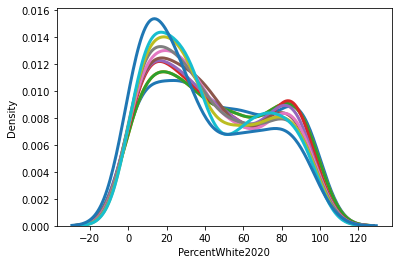

In [19]:
for row in Data:
    if row.startswith('PercentWhite'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
        
#         print(row + " " + str(kstest(Data[row], 'norm')))

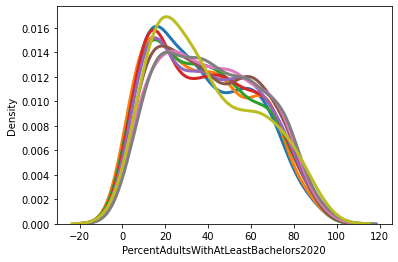

In [20]:
for row in Data:
    if row.startswith('PercentAdultsWithAtLeastBachelors'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
        
#         print(row + " " + str(kstest(Data[row], 'norm')))

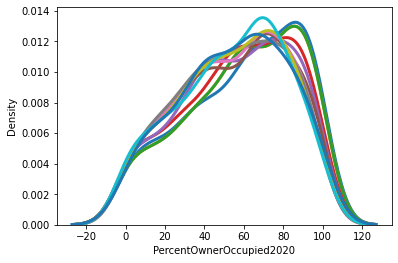

In [21]:
for row in Data:
    if row.startswith('PercentOwnerOccupied'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
        
#         print(row + " " + str(kstest(Data[row], 'norm')))

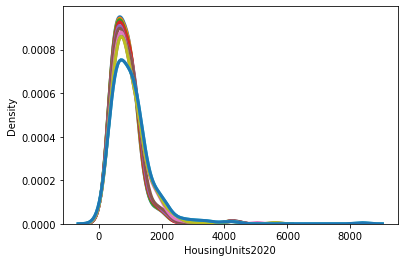

In [22]:
for row in Data:
    if row.startswith('HousingUnits'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
        
#         print(row + " " + str(kstest(Data[row], 'norm')))

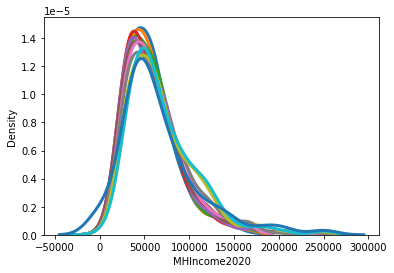

In [23]:
for row in Data:
    if row.startswith('MHIncome'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
        
#         print(row + " " + str(kstest(Data[row], 'norm')))

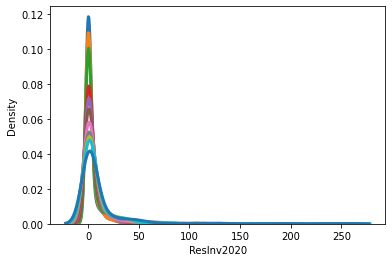

In [24]:
for row in Data:
    if row.startswith('ResInv20'):
        sns.distplot(Data[row], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
#         print(row + " " + str(kstest(Data[row], 'norm')))

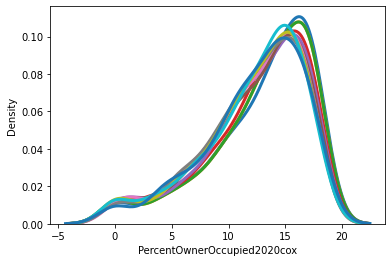

In [25]:
for row in Data:
    if row.startswith('PercentOwnerOccupied'):
        var = row + 'cox'
        Data[row] =  Data[row] + 1
        Data[var] = boxcox(Data[row],0.5)
        sns.distplot(Data[var], hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
        
#         print(row + " " + str(kstest(Data[row], 'norm')))

<AxesSubplot:xlabel='PercentOwnerOccupied2019', ylabel='ResInv2020'>

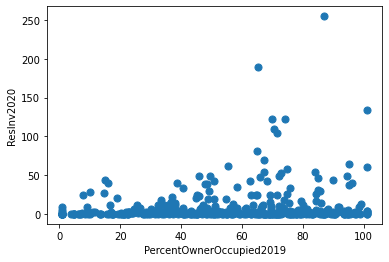

In [26]:
Data.plot.scatter(x='PercentOwnerOccupied2019',y = 'ResInv2020', s = 50)

<AxesSubplot:xlabel='ResReno2010', ylabel='PercentOwnerOccupied2010'>

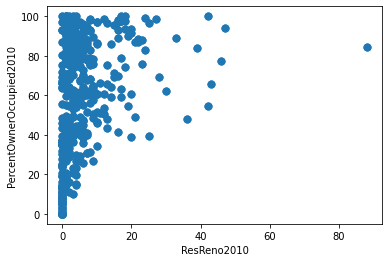

In [23]:
Data.plot.scatter(x='ResReno2010',y = 'PercentOwnerOccupied2010', s = 50)

<AxesSubplot:xlabel='HousingUnits2019', ylabel='ResInv2020'>

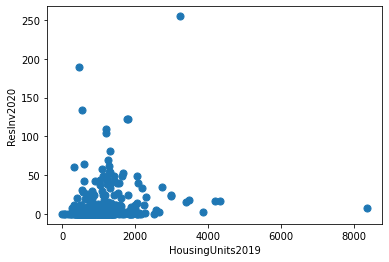

In [28]:
Data.plot.scatter(x='HousingUnits2019',y = 'ResInv2020', s = 50)

<AxesSubplot:xlabel='PercentAdultsWithAtLeastBachelors2019', ylabel='ResInv2020'>

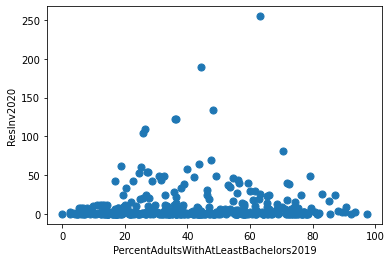

In [29]:
Data.plot.scatter(x='PercentAdultsWithAtLeastBachelors2019',y = 'ResInv2020', s = 50)

<AxesSubplot:xlabel='PercentWhite2019', ylabel='ResInv2020'>

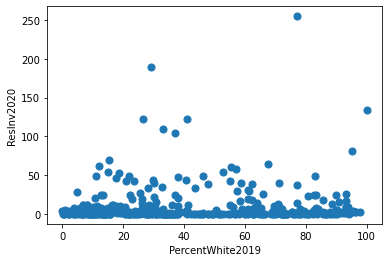

In [30]:
Data.plot.scatter(x='PercentWhite2019',y = 'ResInv2020', s = 50)

<AxesSubplot:xlabel='PercentBlack2019', ylabel='ResInv2020'>

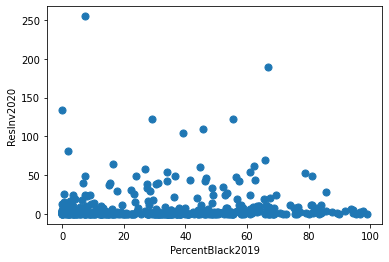

In [31]:
Data.plot.scatter(x='PercentBlack2019',y = 'ResInv2020', s = 50)